In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from numpy.linalg import inv
import matplotlib.cm as cm

In [29]:
df_resultado = pd.DataFrame({'Tempo':[5, 10, 5, 10, 7.5, 7.5, 7.5, 7.5, 4, 11, 7.5, 7.5],
                            'Temperatura':[400, 400, 550, 550, 475, 475, 475, 475,  475, 475, 370, 580],
                            'x1':[-1, 1, -1, 1, 0, 0, 0, 0, -1.4, 1.4, 0, 0],
                            'x2':[-1, -1, 1, 1, 0, 0, 0, 0, 0, 0, -1.4, 1.4],
                            'Energia (kJ)': [8.04, 8.26, 8.16, 8.52, 8.39, 8.35, 8.26, 8.29, 8.08, 8.46, 8.14, 8.50],
                            '% massa': [6.90, 10.58, 14.47, 25.99, 22.36, 24.40, 19.96, 23.42, 18.51, 19.78, 5.28, 25.00],
                            'y':[0.86, 1.28, 1.77, 3.05, 2.66, 2.92, 2.42, 2.82, 2.29, 2.34, 0.65, 2.94]})

In [30]:
df_resultado = df_resultado.round(2)
df_resultado

,Tempo,Temperatura,x1,x2,Energia (kJ),% massa,y
0,5.0,400,-1.0,-1.0,8.04,6.90,0.86
1,10.0,400,1.0,-1.0,8.26,10.58,1.28
2,5.0,550,-1.0,1.0,8.16,14.47,1.77
3,10.0,550,1.0,1.0,8.52,25.99,3.05
4,7.5,475,0.0,0.0,8.39,22.36,2.66
5,7.5,475,0.0,0.0,8.35,24.40,2.92
6,7.5,475,0.0,0.0,8.26,19.96,2.42
7,7.5,475,0.0,0.0,8.29,23.42,2.82
8,4.0,475,-1.4,0.0,8.08,18.51,2.29
9,11.0,475,1.4,0.0,8.46,19.78,2.34


In [31]:
df_resultado['y'].values
df2=df_resultado

# Plot não codificado


In [32]:
df2['Temperatura'].values

array([400, 400, 550, 550, 475, 475, 475, 475, 475, 475, 370, 580])

In [33]:
ones = np.ones(12)
x2 = [ones, df2['Tempo'].values, df2['Temperatura'].values, ((df2['Tempo'].values)**2), ((df2['Temperatura'].values)**2),
     (df2['Tempo'].values*df2['Temperatura'].values)]
x2_b=np.transpose(x2)
print(x2_b)

[[1.00000e+00 5.00000e+00 4.00000e+02 2.50000e+01 1.60000e+05 2.00000e+03]
 [1.00000e+00 1.00000e+01 4.00000e+02 1.00000e+02 1.60000e+05 4.00000e+03]
 [1.00000e+00 5.00000e+00 5.50000e+02 2.50000e+01 3.02500e+05 2.75000e+03]
 [1.00000e+00 1.00000e+01 5.50000e+02 1.00000e+02 3.02500e+05 5.50000e+03]
 [1.00000e+00 7.50000e+00 4.75000e+02 5.62500e+01 2.25625e+05 3.56250e+03]
 [1.00000e+00 7.50000e+00 4.75000e+02 5.62500e+01 2.25625e+05 3.56250e+03]
 [1.00000e+00 7.50000e+00 4.75000e+02 5.62500e+01 2.25625e+05 3.56250e+03]
 [1.00000e+00 7.50000e+00 4.75000e+02 5.62500e+01 2.25625e+05 3.56250e+03]
 [1.00000e+00 4.00000e+00 4.75000e+02 1.60000e+01 2.25625e+05 1.90000e+03]
 [1.00000e+00 1.10000e+01 4.75000e+02 1.21000e+02 2.25625e+05 5.22500e+03]
 [1.00000e+00 7.50000e+00 3.70000e+02 5.62500e+01 1.36900e+05 2.77500e+03]
 [1.00000e+00 7.50000e+00 5.80000e+02 5.62500e+01 3.36400e+05 4.35000e+03]]


In [34]:
np.transpose(x2_b)

array([[1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [5.00000e+00, 1.00000e+01, 5.00000e+00, 1.00000e+01, 7.50000e+00,
        7.50000e+00, 7.50000e+00, 7.50000e+00, 4.00000e+00, 1.10000e+01,
        7.50000e+00, 7.50000e+00],
       [4.00000e+02, 4.00000e+02, 5.50000e+02, 5.50000e+02, 4.75000e+02,
        4.75000e+02, 4.75000e+02, 4.75000e+02, 4.75000e+02, 4.75000e+02,
        3.70000e+02, 5.80000e+02],
       [2.50000e+01, 1.00000e+02, 2.50000e+01, 1.00000e+02, 5.62500e+01,
        5.62500e+01, 5.62500e+01, 5.62500e+01, 1.60000e+01, 1.21000e+02,
        5.62500e+01, 5.62500e+01],
       [1.60000e+05, 1.60000e+05, 3.02500e+05, 3.02500e+05, 2.25625e+05,
        2.25625e+05, 2.25625e+05, 2.25625e+05, 2.25625e+05, 2.25625e+05,
        1.36900e+05, 3.36400e+05],
       [2.00000e+03, 4.00000e+03, 2.75000e+03, 5.50000e+03, 3.56250e+03,
        3.56250e+03, 3

In [35]:
np.transpose(x2_b).dot(x2_b)

array([[1.20000000e+01, 9.00000000e+01, 5.70000000e+03, 7.24500000e+02,
        2.75205000e+06, 4.27500000e+04],
       [9.00000000e+01, 7.24500000e+02, 4.27500000e+04, 6.17625000e+03,
        2.06403750e+07, 3.44137500e+05],
       [5.70000000e+03, 4.27500000e+04, 2.75205000e+06, 3.44137500e+05,
        1.34954625e+09, 2.06403750e+07],
       [7.24500000e+02, 6.17625000e+03, 3.44137500e+05, 5.51313750e+04,
        1.66111875e+08, 2.93371875e+06],
       [2.75205000e+06, 2.06403750e+07, 1.34954625e+09, 1.66111875e+08,
        6.71558914e+11, 1.01215969e+10],
       [4.27500000e+04, 3.44137500e+05, 2.06403750e+07, 2.93371875e+06,
        1.01215969e+10, 1.66111875e+08]])

In [36]:
y = df2['y'].values
y_mat = np.zeros((12,1))
for i in range(np.size(y)):
    y_mat[i,0] = y[i]
y=y_mat
y

array([[0.86],
       [1.28],
       [1.77],
       [3.05],
       [2.66],
       [2.92],
       [2.42],
       [2.82],
       [2.29],
       [2.34],
       [0.65],
       [2.94]])

In [37]:
xtx=np.transpose(x2_b).dot(x2_b)
xty=np.transpose(x2_b).dot(y)

In [38]:
xtx_inv=inv(np.matrix(xtx))
b = xtx_inv.dot(xty)
b

matrix([[-2.28523566e+01],
        [ 2.10631652e-01],
        [ 9.29762849e-02],
        [-4.43936253e-02],
        [-9.64917832e-05],
        [ 1.14666667e-03]])

In [39]:
b[0]

matrix([[-22.85235661]])

In [40]:
b = np.asarray(b) #transforma matrix b em array

In [41]:
X_p = np.linspace(4,11,25)
Y_p = np.linspace(370,580,25)
X_p, Y_p = np.meshgrid(X_p, Y_p)
Z = b[0] + b[1]*X_p + b[2]*Y_p + b[3]*X_p**2 + b[4]*Y_p**2 + b[5]*X_p*Y_p

In [42]:
b

array([[-2.28523566e+01],
       [ 2.10631652e-01],
       [ 9.29762849e-02],
       [-4.43936253e-02],
       [-9.64917832e-05],
       [ 1.14666667e-03]])

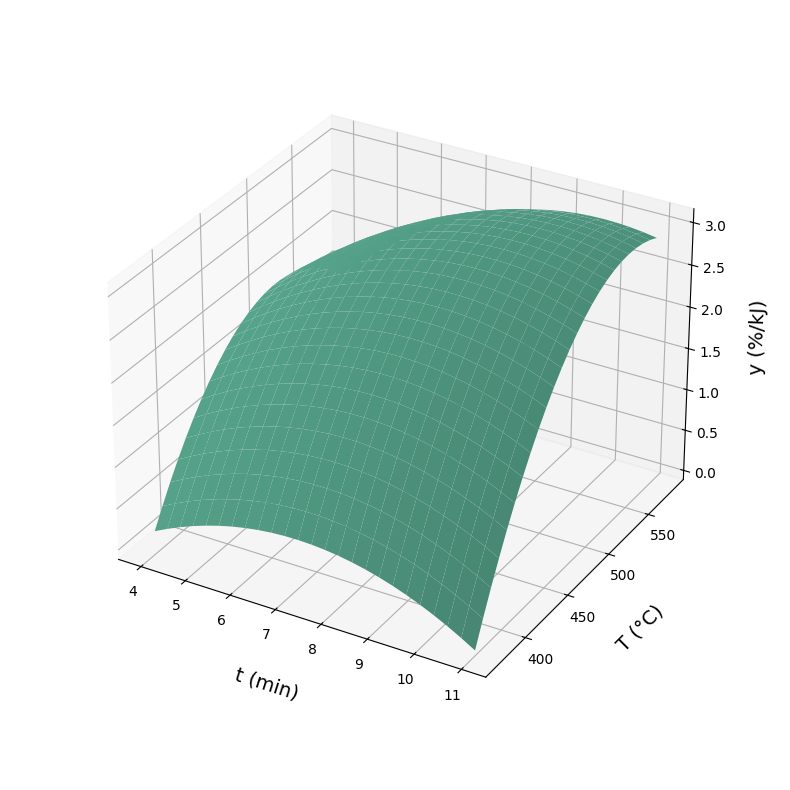

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm

# Criar a figura com dimensões maiores
fig = plt.figure(figsize=(12, 10))  # Figura maior para mais espaço
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície
ax.plot_surface(X_p, Y_p, Z, color=cm.Set2(0))

# Definir rótulos com labelpad controlado
ax.set_xlabel('t (min)', fontsize=14, labelpad=20)
ax.set_ylabel('T (°C)', fontsize=14, labelpad=20)
ax.set_zlabel('y (%/kJ)', fontsize=14, labelpad=15)  # Deixar labelpad zero para teste

# Ajustar manualmente as margens da figura para aumentar espaço na direita
ax.set_box_aspect(None, zoom=0.85)

# Salvando a figura com bbox_inches 'tight' para garantir que nada será cortado
plt.savefig('maximum.png', dpi=300, bbox_inches='tight')  # pad_inches adiciona espaço extra


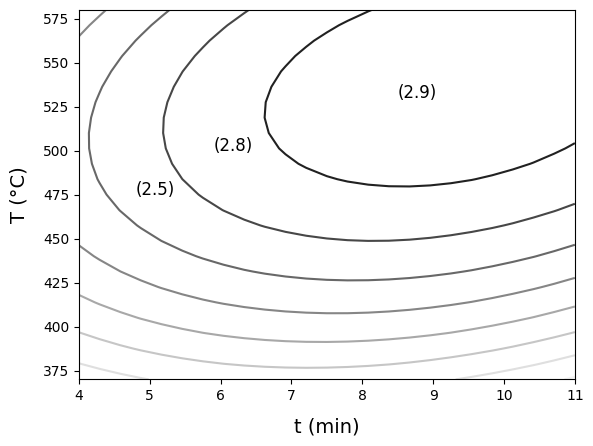

In [44]:
fig, ax = plt.subplots()
ax.contour(X_p, Y_p, Z, cmap = 'Greys',  zorder=0)
ax.text(5.9, 500, '(2.8)', fontsize = 12)
ax.text(8.5, 530, '(2.9)', fontsize = 12)
ax.text(4.8, 475, '(2.5)', fontsize = 12)
ax.set_xlabel('t (min)', fontsize=14, labelpad = 10)
ax.set_ylabel('T (°C)', fontsize=14, labelpad = 10)
plt.savefig('plot-level.png', dpi=300, bbox_inches='tight')